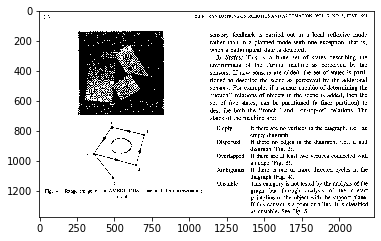

In [393]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("bitmap.pbm", cv2.IMREAD_GRAYSCALE)
largura_imagem, altura_imagem = img.shape
import imageio

plt.imshow(img, "gray")

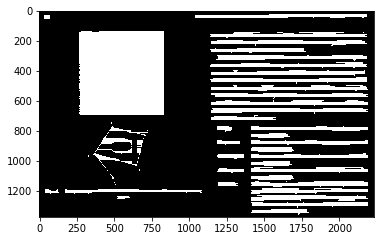

In [394]:
imgOriginal = img.copy()
img2 = cv2.bitwise_not(imgOriginal)
kernel = np.ones((1,100),np.uint8)
dilation = cv2.dilate(img2,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)

kernel2 = np.ones((200,1),np.uint8)
dilation2 = cv2.dilate(img2,kernel2,iterations = 1)
erosion2 = cv2.erode(dilation2,kernel2,iterations = 1)

imgOut = cv2.bitwise_and(erosion, erosion2)

kernel = np.ones((1,30),np.uint8)

imgOut = cv2.morphologyEx(imgOut, cv2.MORPH_CLOSE, kernel)
contours, hierarchy = cv2.findContours(imgOut, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


#contornos = cv2.drawContours(imgOriginal.copy(), contours, -1, (0,255,0), 3)



#print (len(contours[0]))



plt.imshow(imgOut,"gray")

#imageio.imwrite('resultados/teste.png', imgOriginal)

frases =  35


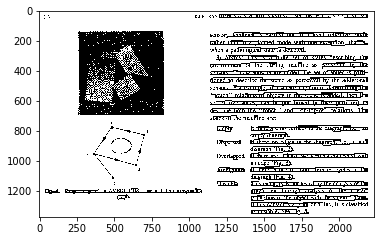

In [395]:
rects = []
imgOriginal = img.copy()
for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        rect = (x, y, w, h)
        rects.append(rect)
        
cont = 0

frases = 0
for r in rects:
    x, y, w, h = r
    total = (w*h)
    pretos = np.sum(imgOriginal[x:x+w, y:y+h] == 0)
    transicoes = np.sum((np.roll(imgOriginal[x:x+w, y:y+h], 1, axis = 0) - imgOriginal[x:x+w, y:y+h]) == 255)
    transicoes += np.sum((np.roll(imgOriginal[x:x+w, y:y+h], 1, axis = 1) - imgOriginal[x:x+w, y:y+h]) == 255)
    if (pretos == 0):
        pretos = 1
        transicoes = 1
    #print (transicoes/pretos)
    if (pretos/total  < 0.2 and transicoes/pretos > 0.15  and total > 1000):
        cv2.drawContours(imgOriginal, contours, cont, (0,255,0), 3)
        frases += 1
        #print ("entrou")
    cont += 1


print ("frases = ", frases)
plt.imshow(imgOriginal,"gray")
imageio.imwrite('resultados/frases.png', imgOriginal)

palavras =  236


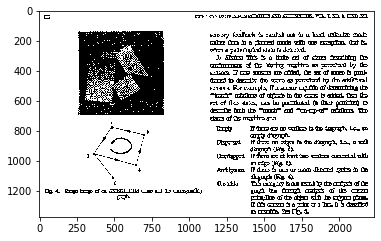

In [396]:
kernel = np.ones((12,12),np.uint8)

imgOut = np.bitwise_not(img.copy())

imgOut = cv2.morphologyEx(imgOut, cv2.MORPH_CLOSE, kernel)

cc, h = cv2.findContours(imgOut, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



rects = []
imgOriginal = img.copy()
for c in cc:
        x, y, w, h = cv2.boundingRect(c)
        rect = (x, y, w, h)
        rects.append(rect)
        
cont = 0

palavras = 0
for r in rects:
    x, y, w, h = r
    total = (w*h)
    pretos = np.sum(imgOriginal[x:x+w, y:y+h] == 0)
    transicoes = np.sum((np.roll(imgOriginal[x:x+w, y:y+h], 1, axis = 0) - imgOriginal[x:x+w, y:y+h]) == 255)
    transicoes += np.sum((np.roll(imgOriginal[x:x+w, y:y+h], 1, axis = 1) - imgOriginal[x:x+w, y:y+h]) == 255)
    if (pretos == 0):
        pretos = 1
        transicoes = 1
    if (pretos/total  < 0.35 and transicoes/pretos > 0.15):
        cv2.drawContours(imgOriginal, cc, cont, (0,255,0), 3)
        palavras += 1
    cont += 1

print("palavras = ", palavras)

plt.imshow(imgOriginal,"gray")
imageio.imwrite('resultados/palavras.png', imgOriginal)